In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [342]:
df = pd.read_csv('schoolpredict.csv')

In [343]:
df.head()

,NOR,PNORG,PNORB,School_Phase,GFTE,Total_Teachers,Total_Teaching_Assistants,School_0ort,Full_Time_Teachers,Pupil_Teacher_Ratio,GPS_AVERAGE,MAT_AVERAGE,READ_AVERAGE
0,285,49.5,50.5,Primary,45421.0,24.0,18.0,30.0,19.1,15.0,111.0,110.0,110.0
1,350,53.4,46.6,Primary,47681.0,20.0,9.0,7.0,18.3,19.1,107.0,103.0,106.0
2,410,49.0,51.0,Primary,47719.0,25.0,15.0,3.0,24.4,16.7,109.0,108.0,108.0
3,405,44.2,55.8,Primary,43671.0,24.0,21.0,9.0,21.2,18.5,113.0,110.0,109.0
4,427,49.2,50.8,Primary,43629.0,25.0,16.0,11.0,21.7,19.4,102.0,100.0,99.0


In [344]:
df.shape

(16508, 13)

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16508 entries, 0 to 16507
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   NOR                         16508 non-null  int64  
 1   PNORG                       16508 non-null  float64
 2   PNORB                       16508 non-null  float64
 3   School_Phase                16508 non-null  object 
 4   GFTE                        16462 non-null  float64
 5   Total_Teachers              16464 non-null  float64
 6   Total_Teaching_Assistants   16464 non-null  float64
 7   School_0ort                 16464 non-null  float64
 8   Full_Time_Teachers          16464 non-null  float64
 9   Pupil_Teacher_Ratio         16464 non-null  float64
 10  GPS_AVERAGE                 15591 non-null  float64
 11  MAT_AVERAGE                 15607 non-null  float64
 12  READ_AVERAGE                15607 non-null  float64
dtypes: float64(11), int64(1), objec

In [346]:
df.describe()

,NOR,PNORG,PNORB,GFTE,Total_Teachers,Total_Teaching_Assistants,School_0ort,Full_Time_Teachers,Pupil_Teacher_Ratio,GPS_AVERAGE,MAT_AVERAGE,READ_AVERAGE
count,16508.000000,16508.000000,16508.000000,16462.000000,16464.000000,16464.000000,16464.000000,16464.000000,16464.000000,15591.000000,15607.000000,15607.000000
mean,414.013206,49.104380,50.895996,38788.366237,24.401421,16.657191,8.727648,21.916260,19.991648,103.428837,102.198437,101.843468
std,346.244102,8.085835,8.085837,3416.455452,23.404529,10.032515,9.645741,21.864543,3.855463,16.817545,16.551533,16.497889
min,6.000000,0.000000,0.000000,23445.000000,3.000000,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000,0.000000
25%,203.000000,46.900000,48.800000,36679.000000,11.000000,10.000000,3.000000,9.200000,17.400000,104.000000,103.000000,102.000000
50%,306.000000,49.000000,51.000000,38504.000000,16.000000,15.000000,5.000000,14.200000,20.100000,106.000000,105.000000,104.000000
75%,472.000000,51.200000,53.100000,40574.750000,26.000000,22.000000,10.000000,22.900000,22.500000,108.000000,107.000000,106.000000
max,2833.000000,100.000000,100.000000,65987.000000,176.000000,115.000000,107.000000,165.000000,50.000000,118.000000,115.000000,116.000000


<Axes: >

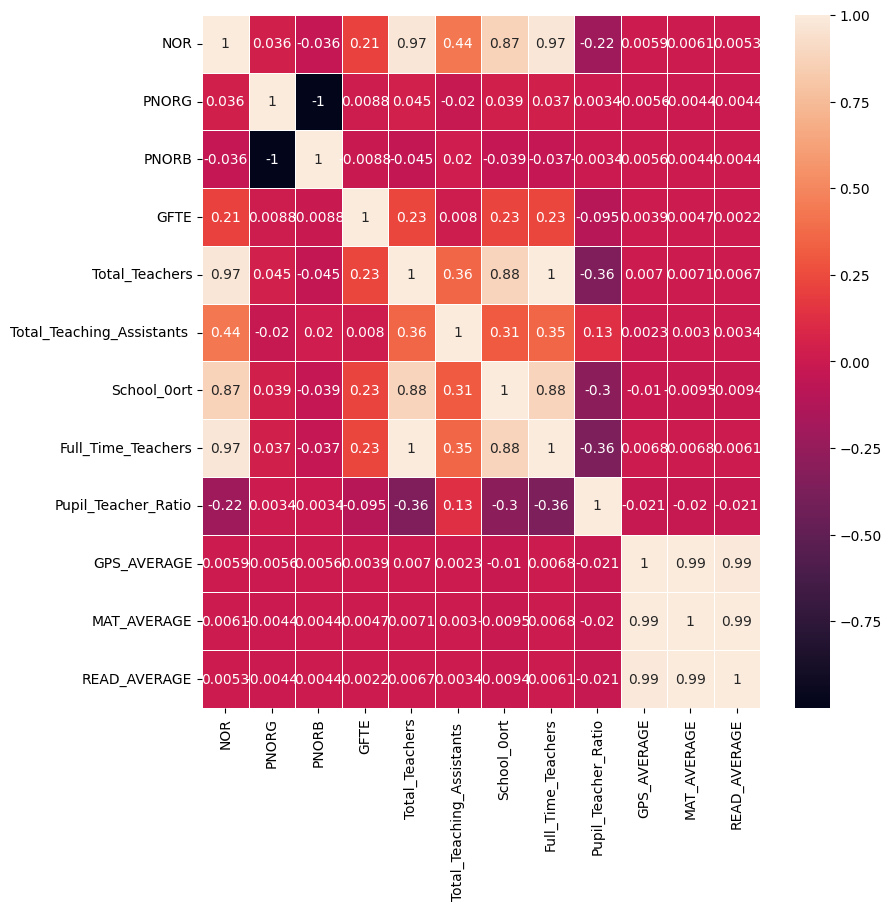

In [347]:
corr_matrix = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(corr_matrix,annot=True,linewidths=.5, ax=ax)

In [348]:
df['SUM_GPS_MAT_READ'] = df['GPS_AVERAGE'] + df['MAT_AVERAGE'] + df['READ_AVERAGE']

In [349]:
df.drop(['GPS_AVERAGE', 'MAT_AVERAGE', 'READ_AVERAGE'], axis=1, inplace=True)

In [350]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    StandardScaler,
    OrdinalEncoder,
    OneHotEncoder
)
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

tx_pipeline = Pipeline([
        ("ordinal_encoder", OrdinalEncoder()),    
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("tx_encoder", OneHotEncoder(sparse_output=False)),
    ])
df.head()

,NOR,PNORG,PNORB,School_Phase,GFTE,Total_Teachers,Total_Teaching_Assistants,School_0ort,Full_Time_Teachers,Pupil_Teacher_Ratio,SUM_GPS_MAT_READ
0,285,49.5,50.5,Primary,45421.0,24.0,18.0,30.0,19.1,15.0,331.0
1,350,53.4,46.6,Primary,47681.0,20.0,9.0,7.0,18.3,19.1,316.0
2,410,49.0,51.0,Primary,47719.0,25.0,15.0,3.0,24.4,16.7,325.0
3,405,44.2,55.8,Primary,43671.0,24.0,21.0,9.0,21.2,18.5,332.0
4,427,49.2,50.8,Primary,43629.0,25.0,16.0,11.0,21.7,19.4,301.0


In [351]:
from sklearn.compose import ColumnTransformer

num_attribs = ['NOR', 'PNORG', 'PNORB', 'GFTE', 'Total_Teachers', 'School_0ort', 'Full_Time_Teachers', 'Pupil_Teacher_Ratio']
tx_attribs = ['School_Phase']

prepprocess_pipeline = ColumnTransformer([
        ('num', num_pipeline, num_attribs),
        ('tx', tx_pipeline, tx_attribs)
])

y_attribs = ['SUM_GPS_MAT_READ']
y_prepprocess_pipeline = ColumnTransformer([
        ('num', num_pipeline, y_attribs)
])

In [352]:
X = prepprocess_pipeline.fit_transform(df)
y = y_prepprocess_pipeline.fit_transform(df)

In [353]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [354]:
def fit_and_score_model(X, y, model_clf, X_v, y_v):
    model_clf.fit(X, y)
    return -model_clf.score(X_v, y_v)

In [355]:
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression,
    Ridge,
    Lasso,
    ElasticNet
)

In [356]:
lir_clf = LinearRegression()
rig_clf = Ridge(alpha=0.1)
las_clf = Lasso(alpha=10)
ela_clf = ElasticNet(alpha=0.01, l1_ratio=0.01)

In [357]:
fit_and_score_model(X_train, y_train, lir_clf, X_val, y_val)

0.0009503371797214832

In [358]:
fit_and_score_model(X_train, y_train, rig_clf, X_val, y_val)

0.0009612729367645123

In [359]:
fit_and_score_model(X_train, y_train, las_clf, X_val, y_val)

0.000376642017006823

In [360]:
fit_and_score_model(X_train, y_train, ela_clf, X_val, y_val)

0.00038399351730467046